In [2]:
import keras
import matplotlib.image as mpimg
import numpy as np
import cv2
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout, Lambda, ELU, concatenate, GlobalAveragePooling2D, Input, BatchNormalization
from keras.activations import relu, softmax
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import Adam
from keras.regularizers import l2
import math

Using TensorFlow backend.


In [216]:
import numpy as np
from PIL import Image
import glob
import copy

In [4]:
from keras import applications 

In [89]:
vgg_model= applications.VGG16(weights='imagenet', include_top=True, input_shape=(224,224,3))


In [5]:
base_model = applications.resnet50.ResNet50(weights='imagenet')



102858752/102853048 [==============================] - 27s 0us/step


In [43]:
res_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_8[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_344 (Activation)     (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [84]:
vgg_model.layers.pop()

In [85]:
print(len(vgg_model.layers))

20


In [40]:
im = Image.open("/Users/normand/Desktop/berlinpic.jpg")

In [41]:
from PIL import Image, ImageOps
thumb = ImageOps.fit(im, (224,224), Image.ANTIALIAS)

In [14]:
thumb.show()

In [86]:
vgg_model.predict(np.asarray(thumb).reshape((1,224,224,3))).shape

(1, 1000)

In [10]:
for layer in base_model.layers:
    print(layer.name)

input_3
conv1
bn_conv1
activation_99
max_pooling2d_3
res2a_branch2a
bn2a_branch2a
activation_100
res2a_branch2b
bn2a_branch2b
activation_101
res2a_branch2c
res2a_branch1
bn2a_branch2c
bn2a_branch1
add_33
activation_102
res2b_branch2a
bn2b_branch2a
activation_103
res2b_branch2b
bn2b_branch2b
activation_104
res2b_branch2c
bn2b_branch2c
add_34
activation_105
res2c_branch2a
bn2c_branch2a
activation_106
res2c_branch2b
bn2c_branch2b
activation_107
res2c_branch2c
bn2c_branch2c
add_35
activation_108
res3a_branch2a
bn3a_branch2a
activation_109
res3a_branch2b
bn3a_branch2b
activation_110
res3a_branch2c
res3a_branch1
bn3a_branch2c
bn3a_branch1
add_36
activation_111
res3b_branch2a
bn3b_branch2a
activation_112
res3b_branch2b
bn3b_branch2b
activation_113
res3b_branch2c
bn3b_branch2c
add_37
activation_114
res3c_branch2a
bn3c_branch2a
activation_115
res3c_branch2b
bn3c_branch2b
activation_116
res3c_branch2c
bn3c_branch2c
add_38
activation_117
res3d_branch2a
bn3d_branch2a
activation_118
res3d_branch2b


In [44]:
res_model = applications.resnet50.ResNet50(weights='imagenet')
model = Model(inputs=res_model.input, outputs=res_model.get_layer('flatten_9').output)

In [93]:
#base_model = applications.VGG16(weights='imagenet')
#model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

In [45]:
model.predict(np.asarray(thumb).reshape((1,224,224,3))).shape

(1, 2048)

In [46]:
arc1 = Image.open("/Users/normand/Desktop/foto_instagram/Architecture/1.png")
arc2 = Image.open("/Users/normand/Desktop/foto_instagram/Architecture/2.png")
food1 = Image.open("/Users/normand/Desktop/foto_instagram/Food/1.png")
food2 = Image.open("/Users/normand/Desktop/foto_instagram/Food/2.png")

In [47]:
arc1.thumbnail((224,224), Image.ANTIALIAS)
arc2.thumbnail((224,224), Image.ANTIALIAS)
food1.thumbnail((224,224), Image.ANTIALIAS)
food2.thumbnail((224,224), Image.ANTIALIAS)

In [48]:
arc1 = ImageOps.fit(arc1, (224,224), Image.ANTIALIAS)
arc2 = ImageOps.fit(arc2, (224,224), Image.ANTIALIAS)
food1 = ImageOps.fit(food1, (224,224), Image.ANTIALIAS)
food2 = ImageOps.fit(food2, (224,224), Image.ANTIALIAS)

In [98]:
arc1.show()
arc2.show()
food1.show()
food2.show()

In [49]:
np.asarray(arc1).shape

(224, 224, 4)

In [50]:
arc1_feat = model.predict(np.asarray(arc1)[:,:,:3].reshape((1,224,224,3)))
arc2_feat = model.predict(np.asarray(arc2)[:,:,:3].reshape((1,224,224,3)))
food1_feat = model.predict(np.asarray(food1)[:,:,:3].reshape((1,224,224,3)))
food2_feat = model.predict(np.asarray(food2)[:,:,:3].reshape((1,224,224,3)))

In [51]:
import scipy

In [55]:
scipy.spatial.distance.cosine(arc1_feat, arc2_feat)

0.44191527366638184

In [196]:
features=[]
class_n=[]

In [197]:
num_class=0
last_folder=None
for folder in glob.glob("/Users/normand/Desktop/foto_instagram/*"):
    for pic in glob.glob(folder + "/*.png"):
        im=Image.open(pic)
        im.thumbnail((224,224), Image.ANTIALIAS)
        im=ImageOps.fit(im, (224,224), Image.ANTIALIAS)
        #im.show()
        feat = model.predict(np.asarray(im)[:,:,:3].reshape((1,224,224,3)))
        features.append(feat)
        if last_folder is not None and not (folder==last_folder):
            num_class+=1
        class_n.append(num_class)
        last_folder=folder

In [198]:
class_n

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9]

In [199]:
features=np.asarray(features)

In [200]:
print(features.shape)
features=features.reshape(109,2048)

(109, 1, 2048)


In [49]:
for item in glob.glob("/Users/normand/Desktop/foto_instagram/Food/*.png"):
    print(item)

/Users/normand/Desktop/foto_instagram/Food/1.png
/Users/normand/Desktop/foto_instagram/Food/10.png
/Users/normand/Desktop/foto_instagram/Food/11.png
/Users/normand/Desktop/foto_instagram/Food/2.png
/Users/normand/Desktop/foto_instagram/Food/3.png
/Users/normand/Desktop/foto_instagram/Food/4.png
/Users/normand/Desktop/foto_instagram/Food/5.png
/Users/normand/Desktop/foto_instagram/Food/6.png
/Users/normand/Desktop/foto_instagram/Food/7.png
/Users/normand/Desktop/foto_instagram/Food/8.png
/Users/normand/Desktop/foto_instagram/Food/9.png


In [114]:
"""
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(features)
X_embedded.shape"""

(109, 2)

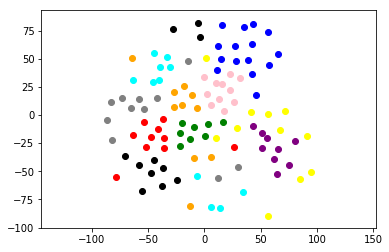

In [201]:
colors=['red','blue', 'yellow', 'black', 'cyan', 'pink', 'orange', 'purple','gray', 'green']
#      animal archit  concert  dresses    food    int   landscape   party    plants   selfie
import matplotlib.pyplot as plt
for el in range(len(X_embedded)):
    item=X_embedded[el]
    if not np.abs(item[0])>100 and not np.abs(item[1])>100: 


        plt.scatter(item[0],item[1], color=colors[class_n[el]])
plt.axis('equal')
plt.show()

In [152]:
means_x_c=np.zeros(10)
means_y_c=np.zeros(10)
n_elem_class=np.zeros(10, dtype="int")
for el in range(len(X_embedded)):
    item=X_embedded[el]
    if not np.abs(item[0])>100 or not np.abs(item[1])>100: 
        means_x_c[class_n[el]]+=item[0]
        means_y_c[class_n[el]]+=item[1]
        n_elem_class[class_n[el]]+=1

for i in range(len(n_elem_class)):
    means_x_c[i]/=n_elem_class[i]
    means_y_c[i]/=n_elem_class[i]


In [153]:
means_y_c[2]

-30.599576373895008

In [156]:
X_cocktails=[]
Y_cocktails=[]
for i in range(len(means_x_c)):
    mean=[means_x_c[i],means_y_c[i]]
    X_cocktails.append(np.asarray(mean))
    Y_cocktails.append(i)
X_cocktails=np.asarray(X_cocktails)
Y_cocktails=np.asarray(Y_cocktails)

In [159]:
X_cocktails

array([[-41.86036587, -22.19771209],
       [ 35.74939874,  55.70125046],
       [ 54.69663862, -30.59957637],
       [-37.65838307, -16.52750917],
       [-22.86588261,  -0.33079598],
       [ 15.14238548,  21.57503202],
       [-19.18215733,  -2.05955882],
       [ 60.7441296 , -29.39153322],
       [-47.01693804,  -1.26287391],
       [ -8.17718916, -14.37258291]])

In [160]:
Y_cocktails

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [139]:
class_n=np.asarray(class_n)
np.where(class_n>0)[0]

array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108])

In [142]:
for elem in np.where(class_n==0)[0]:
    print(elem)
    print(scipy.spatial.distance.cosine(features[0],features[elem]))

0
0.0
1
0.72476926446
2
0.68766438961
3
0.677066683769
4
0.768290922046
5
0.537976801395
6
0.812535718083
7
0.822477966547
8
0.65221658349
9
0.719452440739


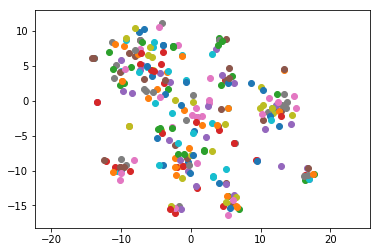

-14.218397
17.627356
-16.35727
11.138618


In [173]:
min_x=10000
max_x=-10000
min_y=100000
max_y=-100000
with open("/Users/normand/Downloads/converge-to-cocktail-master-2/TSECocktail.csv", "r",encoding='utf-8', errors='ignore') as file:
    for line in file:
     #   print(line.split(',')[2])
        if line.split(',')[2]=="x":
            continue
        x=float(line.split(',')[2])
        y=float(line.split(',')[3])
        plt.scatter(x,y)
        if x<min_x: 
            min_x=x
        if x>max_x:
            max_x=x
        if y<min_y: 
            min_y=y
        if y>max_y:
            max_y=y
    plt.axis('equal')
    plt.show()
    print(min_x)
    print(max_x)
    print(min_y)
    print(max_y)

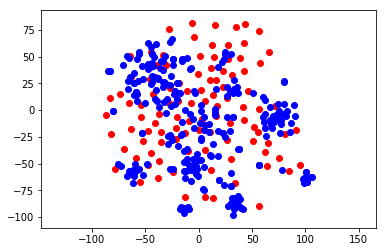

-14.218397
17.627356
-16.35727
11.138618


In [262]:
colors=['red','blue', 'yellow', 'black', 'cyan', 'pink', 'orange', 'purple','gray', 'green']
import matplotlib.pyplot as plt
for el in range(len(X_embedded)):
    item=X_embedded[el]
    if (not (np.abs(item[0])>100)) and (not (np.abs(item[1])>100)): 
        plt.scatter(item[0],item[1], color=colors[0])
plt.axis('equal')


min_x=10000
max_x=-10000
min_y=100000
max_y=-100000
with open("/Users/normand/Downloads/converge-to-cocktail-master-2/TSECocktail.csv", "r", encoding='utf-8', errors='ignore') as file:
    for line in file:
     #   print(line.split(',')[2])
        if line.split(',')[2]=="x":
            continue
        x=float(line.split(',')[2])
        y=float(line.split(',')[3])
        plt.scatter(x*6,y*6, color="blue")
        if x<min_x: 
            min_x=x
        if x>max_x:
            max_x=x
        if y<min_y: 
            min_y=y
        if y>max_y:
            max_y=y
    plt.axis('equal')
    plt.show()
    print(min_x)
    print(max_x)
    print(min_y)
    print(max_y)

In [325]:
def show_embeds(in_x,in_y):
    colors=['red','blue', 'yellow', 'black', 'cyan', 'pink', 'orange', 'purple','gray', 'green']
    import matplotlib.pyplot as plt
    for el in range(len(X_embedded)):
        item=X_embedded[el]
        if (not (np.abs(item[0])>100)) and (not (np.abs(item[1])>100)): 
            plt.scatter(item[0],item[1], color=colors[8])
    plt.axis('equal')


    min_x=10000
    max_x=-10000
    min_y=100000
    max_y=-100000
    with open("/Users/normand/Downloads/converge-to-cocktail-master-2/TSECocktail.csv", "r", encoding='utf-8', errors='ignore') as file:
        for line in file:
         #   print(line.split(',')[2])
            if line.split(',')[2]=="x":
                continue
            x=float(line.split(',')[2])
            y=float(line.split(',')[3])
            plt.scatter(x*6,y*6, color="blue")
            if x<min_x: 
                min_x=x
            if x>max_x:
                max_x=x
            if y<min_y: 
                min_y=y
            if y>max_y:
                max_y=y
        plt.axis('equal')
        plt.scatter(in_x,in_y,color="red")
        plt.show()


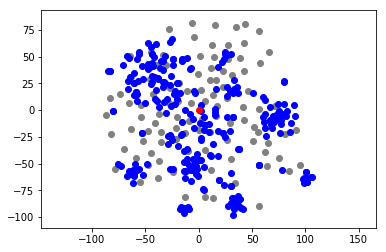

In [326]:
show_embeds(0,0)

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


clf = neighbors.KNeighborsClassifier(3, metric='euclidean')
clf.fit(X_cocktails, Y_cocktails)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [171]:
clf.predict(np.array([50,50]).reshape(1,-1))

array([1])

In [181]:
!instagram-scraper dante95

Searching dante95 for profile pic: 100% 1/1 [00:00<00:00, 285.72 images/s]
Searching dante95 for posts: 151 media [00:06, 22.22 media/s]
Downloading:  99%|#########8| 150/152 [00:13<00:00, 10.99it/s]

KeyboardInterrupt: 

In [189]:
import subprocess
#subprocess.check_output(['ls','-l']) #all that is technically needed...
subprocess.run(['instagram-scraper','derexed', '-m 3'])

KeyboardInterrupt: 

In [191]:
features=np.zeros((1,2048))
for pic in glob.glob("/Users/normand/Desktop/derexed" + "/*.jpg"):
    im=Image.open(pic)
    im.thumbnail((224,224), Image.ANTIALIAS)
    im=ImageOps.fit(im, (224,224), Image.ANTIALIAS)
    #im.show()
    feat = model.predict(np.asarray(im)[:,:,:3].reshape((1,224,224,3)))
    features+=feat
features/=10


In [192]:
features

array([[ 0.06436306,  0.36066333,  0.04288831, ...,  0.82756993,
         0.06697358,  0.11577472]])

In [194]:
features.shape

(1, 2048)

In [210]:
y_features=[]
for i in range(0,109):
    y_features.append(i)
y_features=np.asarray(y_features)

In [211]:
y_features

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108])

In [232]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


near_image = neighbors.KNeighborsClassifier(1, metric='euclidean')
near_image.fit(features, y_features)

near_image.predict(features[11].reshape(1,-1))

array([11])

In [ ]:
near_image = neighbors.KNeighborsClassifier(1, metric='euclidean')
near_image.fit(X_cocktails, y_features)

near_image.predict(features[11].reshape(1,-1))

In [234]:
X_closest=X_embedded[near_image.predict(features[11].reshape(1,-1))]
X_closest
X_embedded[11]

array([ 42.41747665,  63.03625107], dtype=float32)

In [242]:
X_cocktails=[]
Y_cocktails=[]
name_cocktails=[]
n=0
with open("/Users/normand/Downloads/converge-to-cocktail-master-2/TSECocktail.csv", "r", encoding='utf-8', errors='ignore') as file:
    for line in file:
     #   print(line.split(',')[2])
        if line.split(',')[2]=="x":
            continue
        x=float(line.split(',')[2])
        y=float(line.split(',')[3])
        X_cocktails.append([x,y])
        Y_cocktails.append(n)
        name_cocktails.append(line.split(',')[1])
        n+=1
X_cocktails=np.asarray(X_cocktails)
Y_cocktails=np.asarray(Y_cocktails)

In [246]:
near_cocktail = neighbors.KNeighborsClassifier(1, metric='euclidean')
near_cocktail.fit(X_cocktails, Y_cocktails)

print(name_cocktails[near_cocktail.predict(X_cocktails[11].reshape(1,-1))[0]])

Black Feather


In [316]:
def from_im_to_cocktail(im_feats):
    near_im=near_image.predict(im_feats.reshape(1,-1))
    im_emb=X_embedded[near_im]
    
    show_embeds(im_emb[0][0],im_emb[0][1])
    near_ck=near_cocktail.predict(im_emb.reshape(1,-1))
    print(near_ck)
    #show_embeds(near_ck[0][0],near_ck[0][1])
    return name_cocktails[int(near_ck)]

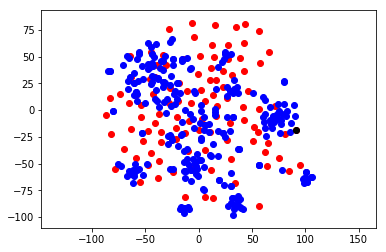

[62]


'French 75'

In [318]:
from_im_to_cocktail(features[30])

In [327]:
def featurefy(image_path):
    im=Image.open(image_path)
    im.thumbnail((224,224), Image.ANTIALIAS)
    im=ImageOps.fit(im, (224,224), Image.ANTIALIAS)
    #im.show()
    feat = model.predict(np.asarray(im)[:,:,:3].reshape((1,224,224,3)))
    return feat

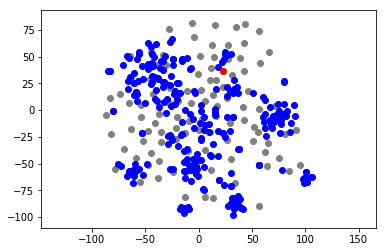

[95]


'Margarita'

In [330]:
from_im_to_cocktail(featurefy("/Users/normand/Desktop/derexed/25007087_330947347381499_6504931418097844224_n.jpg"))

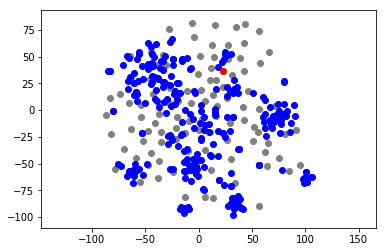

[95]


In [340]:
open_cocktail(from_im_to_cocktail(featurefy("/Users/normand/Desktop/derexed/25007087_330947347381499_6504931418097844224_n.jpg")))

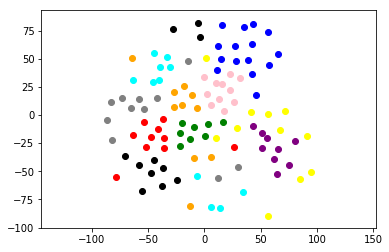

In [329]:
colors=['red','blue', 'yellow', 'black', 'cyan', 'pink', 'orange', 'purple','gray', 'green']
#      animal archit  concert  dresses    food    int   landscape   party    plants   selfie
import matplotlib.pyplot as plt
for el in range(len(X_embedded)):
    item=X_embedded[el]
    if not np.abs(item[0])>100 and not np.abs(item[1])>100: 


        plt.scatter(item[0],item[1], color=colors[class_n[el]])
plt.axis('equal')
plt.show()

In [339]:
def open_cocktail(name):
    import sqlite3
    from selenium import webdriver
    from selenium.webdriver.chrome.options import Options 
    from selenium.webdriver.common.by import By
    from selenium.webdriver.support.ui import WebDriverWait
    from selenium.webdriver.support import expected_conditions as EC

    cocktail_name = name


    chromedriver_location = "/Users/normand/Desktop/chromedriver"
    url = 'http://drinkboy.com/Cocktails/Recipe.aspx?itemid={}'
    conn = sqlite3.connect('cocktails.db')

    cur = conn.cursor()
    cur.execute('SELECT ID FROM COCKTAILS WHERE NAME = ?', (cocktail_name, ))
    results = cur.fetchall()
    id = list(results[0])[0]
    browser = webdriver.Chrome(chromedriver_location)
    browser.get(url.format(id))

In [336]:
import sqlite3
from selenium import webdriver
from selenium.webdriver.chrome.options import Options 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

cocktail_name = 'Alaska'


chromedriver_location = "/Users/normand/Desktop/chromedriver"
url = 'http://drinkboy.com/Cocktails/Recipe.aspx?itemid={}'
conn = sqlite3.connect('cocktails.db')

cur = conn.cursor()
cur.execute('SELECT ID FROM COCKTAILS WHERE NAME = ?', (cocktail_name, ))
results = cur.fetchall()
id = list(results[0])[0]
browser = webdriver.Chrome(chromedriver_location)
browser.get(url.format(id))